# Data Analysis
The data analysis and the model will be created using the language Python and some of it's libraries. Python has become one of the best programming languages to deal with machine learning and data analysis, due to the great community and a good amount of great libraries to work with datasets, plots, linear algrebra and more

## Importing the necessary libraries and update some configurations

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

# Machine Learning, Model Selection and Metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

# Display a higher number of columns and rows
# Required because wee need to be able to display every line and column sometimes, especially with calc_nan_percentage 
pd.set_option('display.max_columns', 231)
pd.options.display.max_rows = 200


## Defining functions to work with the data, visualize information and train algorithms

In [2]:
# Display the amount of NaN per column, and the number of values in the biggest group
def calc_nan_percentage(data):
    stats = []
    for col in data.columns:
        stats.append((col, data[col].nunique(), data[col].isnull().sum() * 100 / data.shape[0],
                      data[col].value_counts(normalize=True, dropna=False).values[0] * 100, data[col].dtype))
    stats_df = pd.DataFrame(stats, columns=['Feature', 'Unique_values', 'Percentage of missing values', 'Percentage of values in the biggest category', 'type'])
    return stats_df.sort_values('Percentage of missing values', ascending=False)



# Remove the columns with the amount of NaN greater than 'percentage'
# or with the amount of values in the biggest group greater than 'percentage'
def remove_bad_columns(data, percentage):
    #remove the columns with the highest percentage of missing values
    good_cols = list(data.columns)
    for col in data.columns:
        rate = data[col].value_counts(normalize=True, dropna=False).values[0]
        if rate > percentage:
            good_cols.remove(col)
    data = data[good_cols]
    return data


# Run a k-Fold cross-validation with the selected model, dataset and targets
def model_kfold(model,X,Y,folds=10):
    k_fold = KFold(folds)
    auc_rocs = []

    for k, (train, test) in enumerate(k_fold.split(X, Y)):
        X_train, y_train = X.iloc[train], Y.iloc[train]
        X_test, y_test = X.iloc[test], Y.iloc[test]
        
        model.fit(X_train, y_train.values.ravel())
        
        #calc the predictions
        y_pred = model.predict(X_test)
        
        #calc the AUC score
        auc = metrics.roc_auc_score(y_test, y_pred)
        
        auc_rocs.append(auc)
        
    print("AUC_ROC Score:", np.mean(auc_rocs))
    
def plot_percentage_of_nan_values(data):
    # Initialize the matplotlib figure
    f, ax = plt.subplots(figsize=(15, 50))

    percentage_of_nan_values = calc_nan_percentage(data)

    # Plot the total crashes
    sns.set_color_codes("pastel")
    sns.barplot(x="Percentage of missing values", y="Feature", data=percentage_of_nan_values, color="b")

## Loading the data

In [3]:
# Load the data

# Here we call 'remove_bad_columns' to load only the columns with more less than <percentage>% of NaN values
X = remove_bad_columns(pd.read_table("data/orange_small_train.data", sep='\t'), 0.90)

#Uncomment to change the task's target
Y = pd.read_table("targets/orange_small_train_upselling.labels", sep='\t', header=None)
#Y = pd.read_table("targets/orange_small_train_churn.labels", sep='\t', header=None)
#Y = pd.read_table("targets/orange_small_train_appetency.labels", sep='\t', header=None)

## Visualizing the data after dropping unnecessary columns

In [4]:
# We can check the good columns using calc_nan_percentage, if necessary
calc_nan_percentage(X)

,Feature,Unique_values,Percentage of missing values,Percentage of values in the biggest category,type
49,Var201,2,74.434,74.434,object
44,Var194,3,74.432,74.432,object
41,Var189,97,57.956,57.956,float64
70,Var229,4,56.864,56.864,object
66,Var225,3,52.288,52.288,object
57,Var214,15415,50.816,50.816,object
48,Var200,15415,50.816,50.816,object
13,Var72,8,44.760,44.760,float64
21,Var94,20002,44.760,44.760,float64
28,Var126,51,27.840,27.840,float64


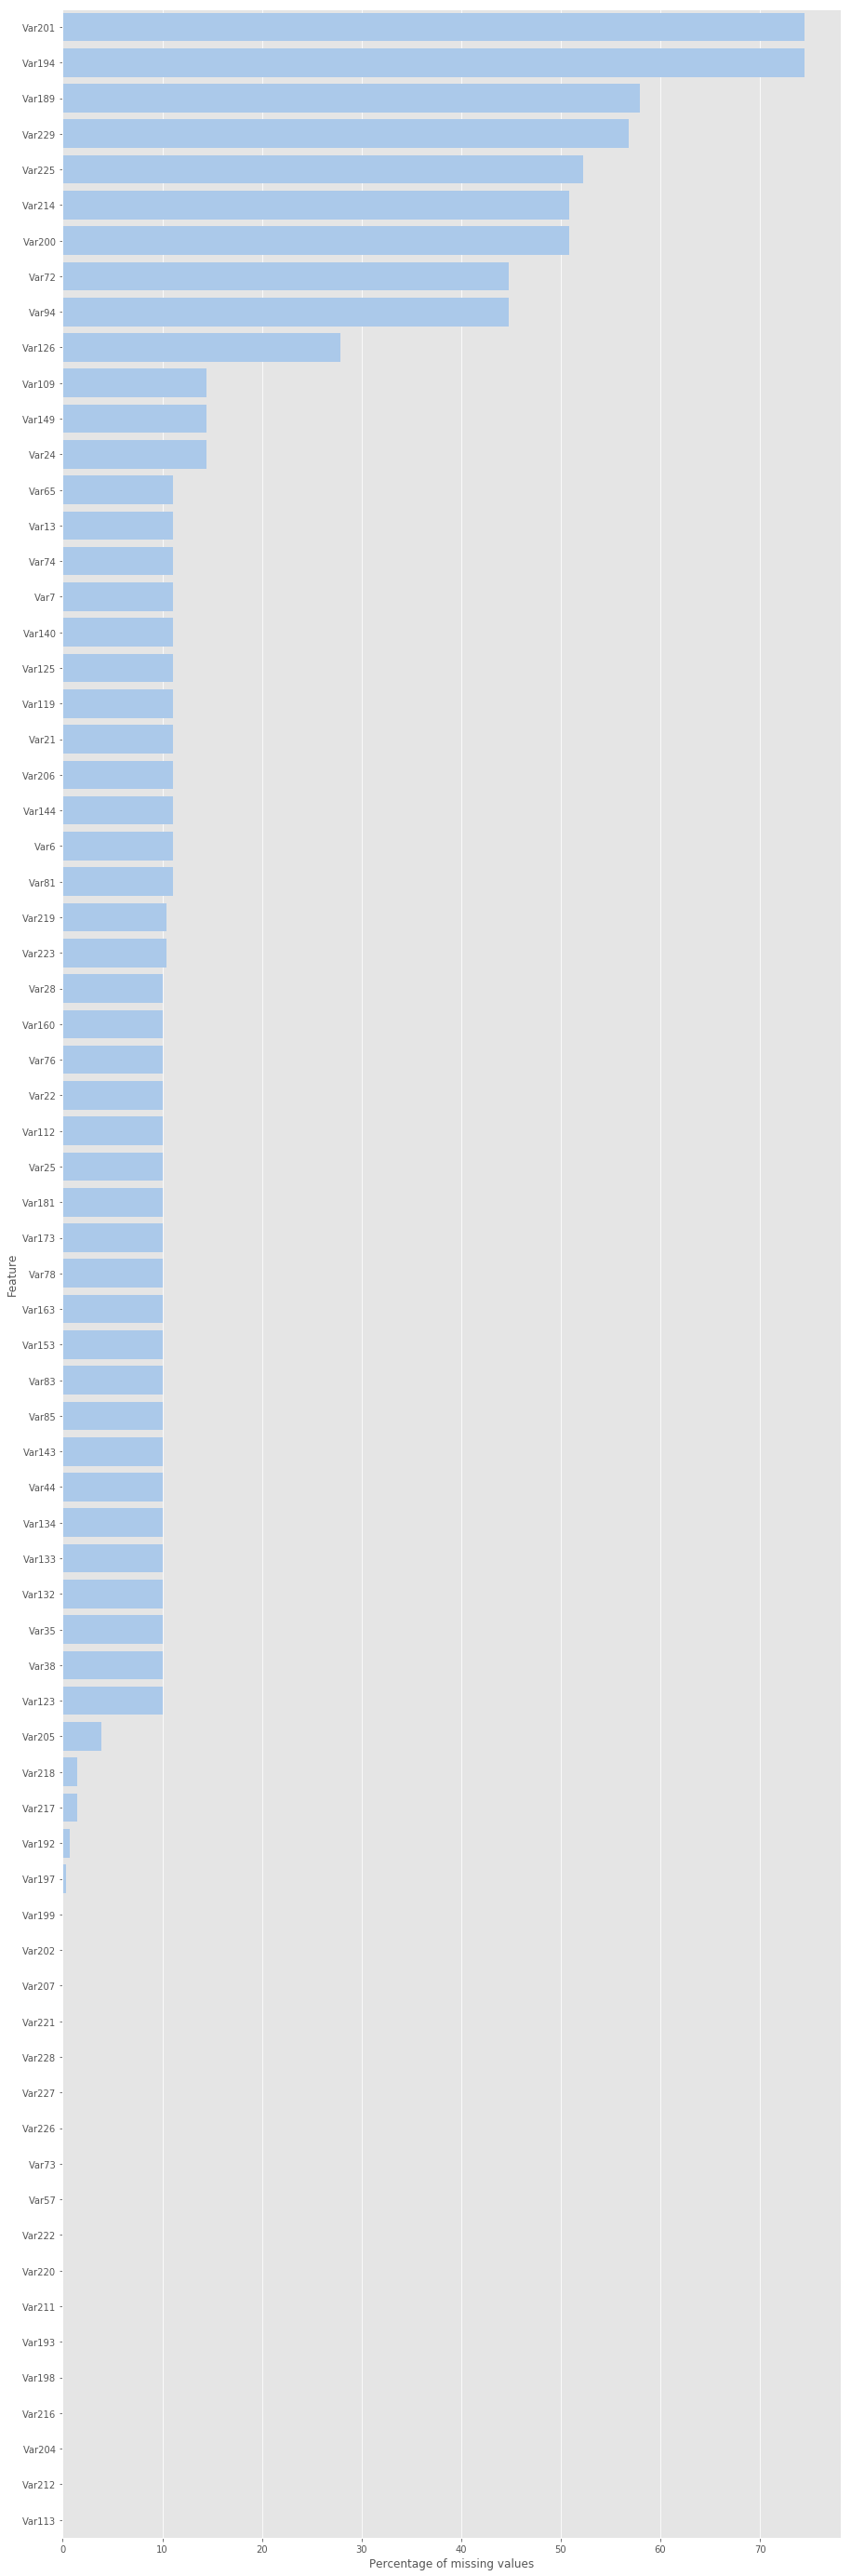

In [5]:
# We can also vizualize the informations above using a barplot
plot_percentage_of_nan_values(X)

In [6]:
print ("Number of rows in the dataset: ", X.shape[0])
print ("Number of columns in the dataset: ", X.shape[1])

Number of rows in the dataset:  50000
Number of columns in the dataset:  71


## Pre-Processing the data
There are some thing to do with the data before creating our model:

- Since there a lot of missing values, and the chosen algorithm does not deal with NaN values, wee need to replace those values before creating our model;
- Another is that the chosen algorithm also does not deal with nominal attributes. In this case wee need to somehow convert those values to numeric values.

In [7]:
# Pre-Processing

# Substitute every missing value with a zero 
X.fillna(0, inplace=True)

# transform the nominal values into categories
obj_cols = X.select_dtypes(include=['object']).columns

# Label encode the categories
# Since the number of possible values in each category is high, it's better to use label encoding o save memory
# One-Hot encoding and Hash Encoding would create too much new columns for the dataset
X[obj_cols] = X[obj_cols].astype('category').apply(lambda x: x.cat.codes)

In [8]:
# We apply the function to remove the bad columns again, but it won't make a big difference
#X = remove_bad_columns(X, 0.95)

## Model Selection
Since we don't know a lot about the features, we need to test different configurations before training our final model. The GridSearch method allows to test different configurations for our algorithm in order to find the best one. It also allows to choose a metric to evaluate the different configurations.

Here the GridSearch will find the best configuration to the Random Forest Classifier Algorithm

In [9]:
# Selecting the best parameters
# The following parameters are based on the following Kaggle notebook
# https://www.kaggle.com/harmeggels/random-forest-feature-importances

rf_params = {
    'min_samples_leaf': [10, 25, 50],
    'n_estimators': [40,100],
    'max_features': [0.5],
    'n_jobs': [-1],
    'oob_score': [False]
    }

grid = GridSearchCV(RandomForestClassifier(), rf_params, refit=True, verbose=3, scoring='roc_auc', n_jobs=-1)
grid.fit(X, Y.values.ravel())
print('Params', grid.best_params_)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


/home/zuno/.local/lib/python3.5/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:  4.8min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:  4.8min finished


Params {'n_estimators': 100, 'n_jobs': -1, 'oob_score': False, 'min_samples_leaf': 50, 'max_features': 0.5}


# Creating, training and testing the Random Forest Classifier model
Now that we know the best parameters to our random Forest Classifier, we can train and test the real classifier. Here we are goint to use the K-fold Cross-Validation method to train and test the classifier with different sets of values. This method was chosen because our dataset is very unbalanced.

After executing the k-fold method, the program will show us the mean AUC score of the k folds tested.

In [10]:
# Classification

# create the classifier using the best parameters from our grid search
classifier = RandomForestClassifier(n_estimators=100, min_samples_leaf=50, max_features=0.5, n_jobs=-1, oob_score=False)

# Call the k-fold cross-validation using our classifier, the clean dataset, the targets and the number of folds
model_kfold(classifier, X, Y,10)

AUC_ROC Score: 0.7160700743517703


# Resultados

- Up-Selling AUC_ROC Score: 0.7160700743517703

- Churn AUC_ROC Score: 0.5

- Appetency AUC_ROC Score: 0.5

- __Total Score__: 0.572023358